In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from numpy.random import randn
from datetime import datetime
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# matplotlib API 入门

## figure和subplot

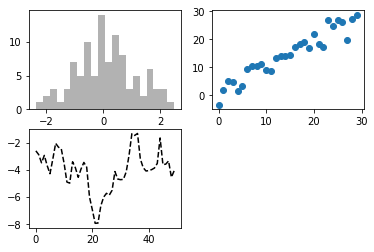

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(randn(50).cumsum(),'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

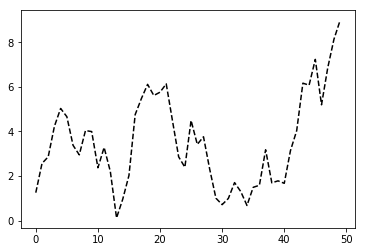

In [51]:
plt.plot(randn(50).cumsum(),'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

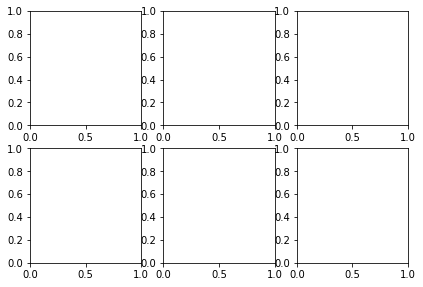

In [102]:
fig, axes = plt.subplots(2,3)
plt.subplots_adjust(left=None,bottom=None,right=1,top=1,
                wspace=None,hspace=None)

In [33]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9092b13d10>,
      dtype=object)

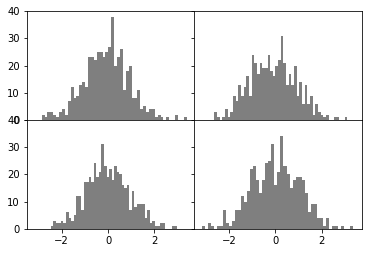

In [99]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

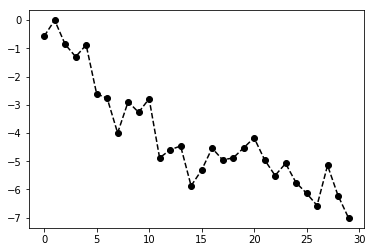

In [41]:
plt.plot(randn(30).cumsum(), 'ko--')

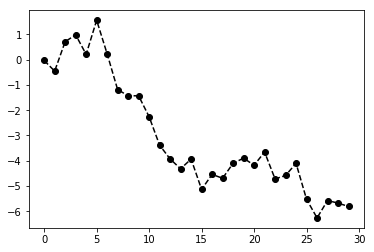

In [43]:
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

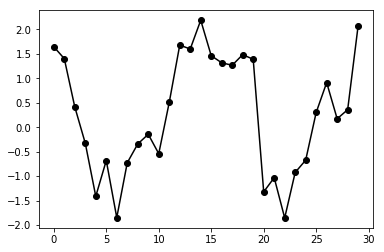

In [103]:
data = randn(30).cumsum()
plt.plot(data,'k-o',label='Default')

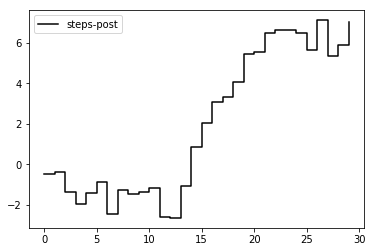

In [47]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

Text(0.5,0,u'States')

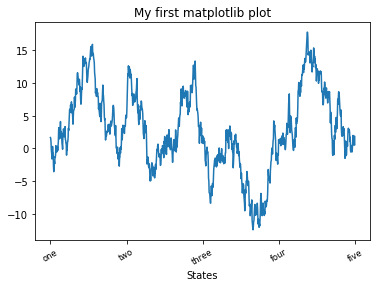

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('States')

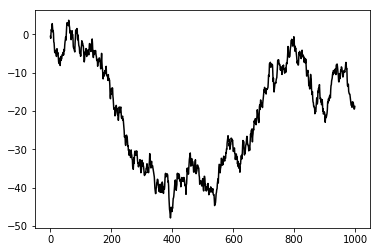

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')

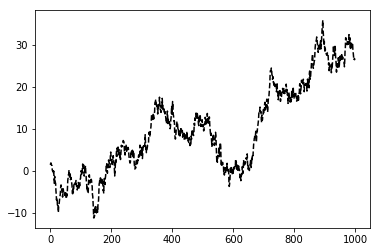

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k--', label='two')

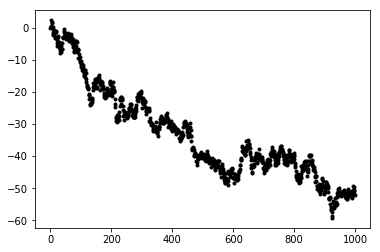

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k.', label='three')

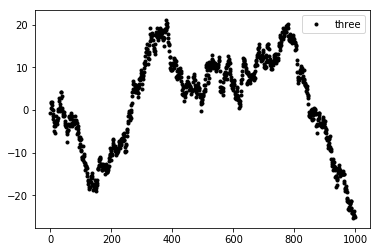

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Text(0.5,1,u'Important dates in 2008-2009 financial crisis')

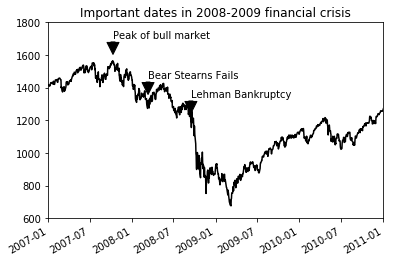

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label, xy=(date, spx[date]+50),
               xytext=(date, spx[date]+200),
               arrowprops={'facecolor': 'black'},
               horizontalalignment='left',verticalalignment='top')
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

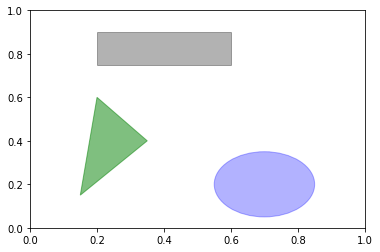

In [93]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [94]:
plt.savefig('ch08/figpath.svg')

# pandas画图函数

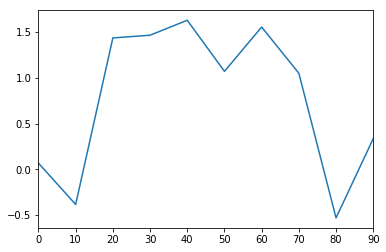

In [105]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

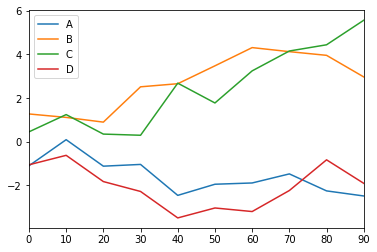

In [106]:
df = DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot()

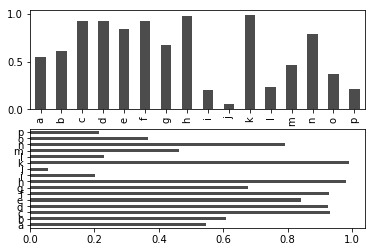

In [118]:
fig,axes = plt.subplots(2,1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

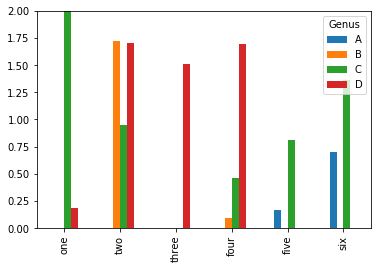

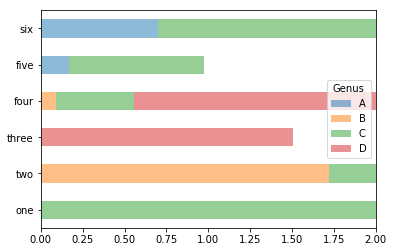

In [122]:
df = DataFrame(np.random.randn(6,4),
              index=['one','two','three','four','five','six'],
              columns=pd.Index(['A','B','C','D'],name='Genus'))
df.plot(kind='bar',ylim=(0,2))
df.plot(kind='barh',stacked=True, alpha=0.5,xlim=(0,2))

In [113]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [114]:
party_counts = party_counts.loc[:,2:5]

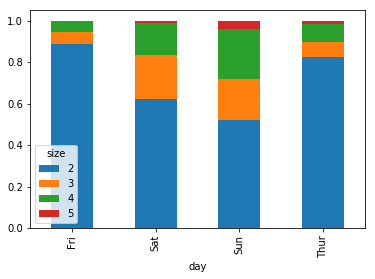

In [116]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts.plot(kind='bar',stacked=True)

In [123]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

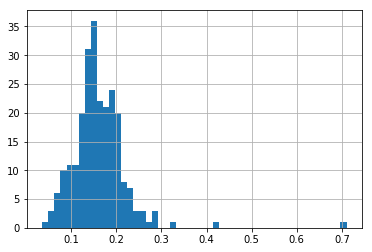

In [124]:
tips['tip_pct'].hist(bins=50)

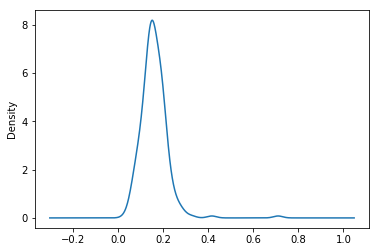

In [125]:
tips['tip_pct'].plot(kind='kde')

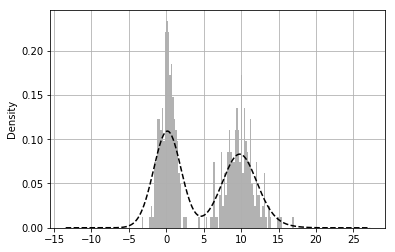

In [130]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values=Series(np.concatenate([comp1,comp2]))
values.plot(kind='kde',style='k--')
values.hist(bins=100,alpha=0.3,color='k',normed=True)

In [131]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,u'Changes in log m1 vs. log unemp')

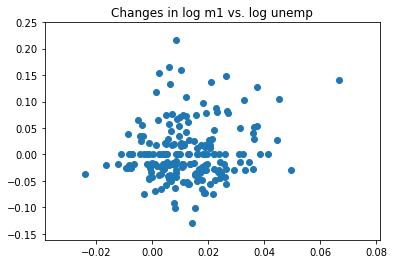

In [132]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1','unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90855a0810>,
      dtype=object)

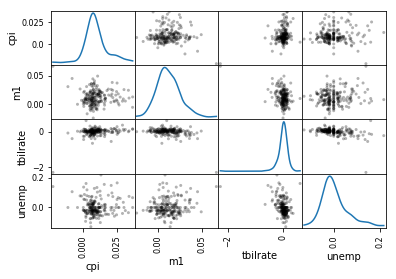

In [134]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde',color='k',alpha=0.3)

# 海地地震危机数据可视化

In [2]:
data = pd.read_csv('ch08/Haiti.csv')

In [3]:
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [4]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [5]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [6]:
data = data[(data.LATITUDE>18)&(data.LATITUDE<20)&
           (data.LONGITUDE>-75)&(data.LONGITUDE<-70)
           &data.CATEGORY.notnull()]

In [7]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [8]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [9]:
def get_english(cat):
    code, names=cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code,names.strip()

In [10]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [11]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)

In [12]:
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [13]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [14]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)

In [17]:
dummy_frame.iloc[:3, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

In [19]:
data = data.join(dummy_frame.add_prefix('category_'))

In [20]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data.iloc[:2,10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [24]:
data.index[:5]

Int64Index([0, 4, 5, 6, 7], dtype='int64')

In [35]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    #创建极球面投影的basemap实例
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon+lllon)/2,
               lat_0=(urlat+lllat)/2,
               llcrnrlat=lllat, urcrnrlat=urlat,
               llcrnrlon=lllon, urcrnrlon=urlon,
               resolution='c')
    #绘制海岸线、州界、国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

TypeError: input must be an array, list, tuple or scalar

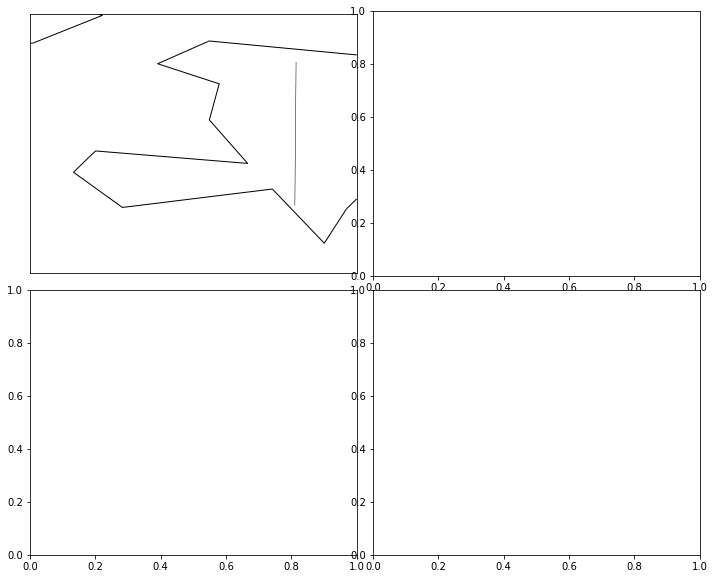

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a','1','3c','7a']
lllat = 17.25
urlat=20.25
lllon = -75
urlon=-71
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,lllon=lllon,urlon=urlon)
    cat_data = data[data['category_%s' % code]==1]
    x, y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    m.plot(x,y,'k.',alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))